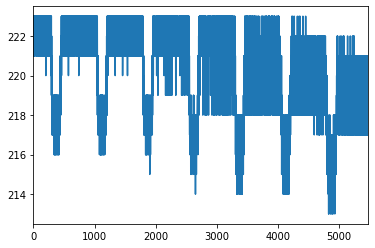

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
date = pd.read_csv('data1.csv')

date.describe()
date_masurate = date['REAL_DATA']
date_masurate.plot.line()
plt.show()


In [38]:
def rolling_window(func, window_size, series):
    output = ['NA']*window_size
    for i in range(window_size,len(series)):
        output.append(func(series[i-window_size:i]))
    return output

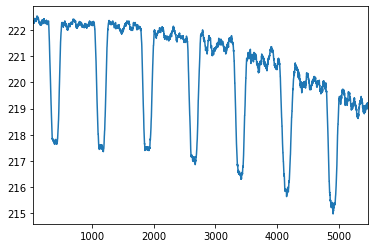

In [39]:
date['300_step_ma']=rolling_window(lambda x : sum(x)/len(x), 50, date['REAL_DATA'].tolist())
from matplotlib import pyplot as plt

date = date[date['300_step_ma'] != 'NA']

diff_moving_average = date['300_step_ma'].diff()

date['300_step_ma'].plot.line()


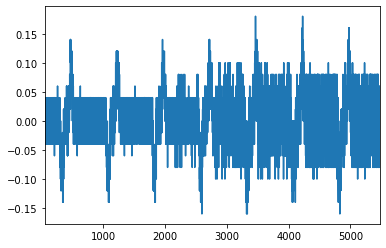

In [40]:
date['diff_moving_average'] = diff_moving_average
date['diff_moving_average'].plot.line()
plt.show()

In [41]:
thresholded_items = []
for item in diff_moving_average:
    if item > 0.1:
        thresholded_items.append(item)
    else:
        thresholded_items.append(0)
        
date['thresholded_values']= pd.Series(thresholded_items)


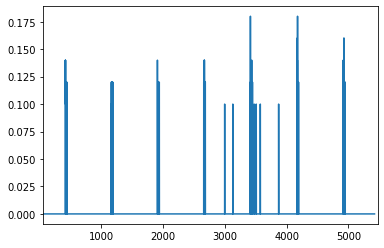

In [42]:
date['thresholded_values'].plot.line()
plt.show()

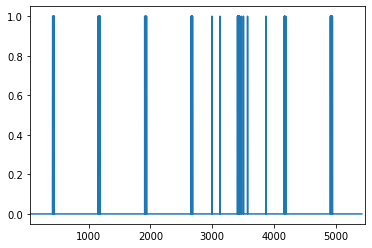

In [43]:
zeroes = [int(item!=0) for item in thresholded_items]
date['transits'] = pd.Series(zeroes)
date['transits'].plot.line()

In [34]:
freq = zeroes.count(1)/zeroes.count(0)
freq

0.01699346405228758

In [35]:
zero_string = ''.join([str(item) for item in zeroes])
zero_string

'000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000110010010000001000000000001100000010101000000000000001000001000000000010100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000